In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
df = pd.read_csv('6dof_dataset.csv')
df["class"] = np.where(df['Success'] > 0, 1, 0)
df.drop(columns=['Unnamed: 0','Move duration','Success','Manipulability - mu',
                 'Mid joint proximity','Max Mid joint proximity','Sum Mid joint proximity- all joints'], inplace=True)
df


grapes_cords = [[1.2, 0, 1.2],
        [1.05, 0, 1.28],
        [1.1, 0, 1.35],
        [0.9, 0, 1.47],
        [1.2, 0, 1.5],
        [1.05, 0, 1.6],
        [0.85, 0, 1.7],
        [1.1, 0, 1.75],
        [1.2, 0, 1.8],
        [0.7, 0, 1.8]]


conditions = [
    (df['Point number'] == 1),
    (df['Point number'] == 2),
    (df['Point number'] == 3),
    (df['Point number'] == 4),
    (df['Point number'] == 5),
    (df['Point number'] == 6),
    (df['Point number'] == 7),
    (df['Point number'] == 8),
    (df['Point number'] == 9),
    (df['Point number'] == 10),
    ]


# create a list of the values we want to assign for each condition
values = [i[0] for i in grapes_cords]
# [i[0] for i in grapes_cords]
values1 = [i[2] for i in grapes_cords]
# create a new column and use np.select to assign values to it using our lists as arguments
df['PointX'] = np.select(conditions, values)
df['PointY'] = 0
df['PointZ'] = np.select(conditions, values1)

# display updated DataFrame
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

df

,Arm_ID,Point number,Joint1 type,Joint1 axis,Link1 length,Joint2 type,Joint2 axis,Link2 length,Joint3 type,Joint3 axis,Link3 length,Joint4 type,Joint4 axis,Link4 length,Joint5 type,Joint5 axis,Link5 length,Joint6 type,Joint6 axis,Link6 length,class,PointX,PointY,PointZ
0,_roll_z_0_1_pitch_y_0_3_pris_z_0_1_pris_y_0_7_...,1,roll,z,0.1,pitch,y,0.3,pris,z,0.1,pris,y,0.7,pitch,y,0.1,pitch,x,0.7,0,1.20,0,1.20
1,_roll_z_0_1_pitch_y_0_3_pris_z_0_1_pris_y_0_7_...,2,roll,z,0.1,pitch,y,0.3,pris,z,0.1,pris,y,0.7,pitch,y,0.1,pitch,x,0.7,0,1.05,0,1.28
2,_roll_z_0_1_pitch_y_0_3_pris_z_0_1_pris_y_0_7_...,3,roll,z,0.1,pitch,y,0.3,pris,z,0.1,pris,y,0.7,pitch,y,0.1,pitch,x,0.7,0,1.10,0,1.35
3,_roll_z_0_1_pitch_y_0_3_pris_z_0_1_pris_y_0_7_...,4,roll,z,0.1,pitch,y,0.3,pris,z,0.1,pris,y,0.7,pitch,y,0.1,pitch,x,0.7,0,0.90,0,1.47
4,_roll_z_0_1_pitch_y_0_3_pris_z_0_1_pris_y_0_7_...,5,roll,z,0.1,pitch,y,0.3,pris,z,0.1,pris,y,0.7,pitch,y,0.1,pitch,x,0.7,0,1.20,0,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025395,_roll_z_0_1_roll_y_0_7_pris_z_0_5_pris_y_0_1_r...,6,roll,z,0.1,roll,y,0.7,pris,z,0.5,pris,y,0.1,roll,x,0.1,pitch,y,0.3,1,1.05,0,1.60
1025396,_roll_z_0_1_roll_y_0_7_pris_z_0_5_pris_y_0_1_r...,7,roll,z,0.1,roll,y,0.7,pris,z,0.5,pris,y,0.1,roll,x,0.1,pitch,y,0.3,1,0.85,0,1.70
1025397,_roll_z_0_1_roll_y_0_7_pris_z_0_5_pris_y_0_1_r...,8,roll,z,0.1,roll,y,0.7,pris,z,0.5,pris,y,0.1,roll,x,0.1,pitch,y,0.3,1,1.10,0,1.75
1025398,_roll_z_0_1_roll_y_0_7_pris_z_0_5_pris_y_0_1_r...,9,roll,z,0.1,roll,y,0.7,pris,z,0.5,pris,y,0.1,roll,x,0.1,pitch,y,0.3,1,1.20,0,1.80


In [3]:
''' Drop unnessary features: Poimt number, Point Y, Arm_Id '''
df.drop(columns=['PointY','Arm_ID','Point number','Joint1 axis','Link1 length','Joint1 type'], inplace=True)

'''One Hot encoder to categorical features'''
# Get one hot encoding of columns B
df = pd.get_dummies(df
               ,columns = ['Joint2 type','Joint2 axis','Joint3 type','Joint3 axis','Joint4 type','Joint4 axis',
                          'Joint5 type','Joint5 axis','Joint6 type','Joint6 axis']
               ,drop_first = True
               )
df

,Link2 length,Link3 length,Link4 length,Link5 length,Link6 length,class,PointX,PointZ,Joint2 type_pris,Joint2 type_roll,Joint2 axis_z,Joint3 type_pris,Joint3 type_roll,Joint3 axis_y,Joint3 axis_z,Joint4 type_pris,Joint4 type_roll,Joint4 axis_y,Joint4 axis_z,Joint5 type_pris,Joint5 type_roll,Joint5 axis_y,Joint5 axis_z,Joint6 type_pris,Joint6 type_roll,Joint6 axis_y,Joint6 axis_z
0,0.3,0.1,0.7,0.1,0.7,0,1.20,1.20,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
1,0.3,0.1,0.7,0.1,0.7,0,1.05,1.28,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
2,0.3,0.1,0.7,0.1,0.7,0,1.10,1.35,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
3,0.3,0.1,0.7,0.1,0.7,0,0.90,1.47,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
4,0.3,0.1,0.7,0.1,0.7,0,1.20,1.50,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025395,0.7,0.5,0.1,0.1,0.3,1,1.05,1.60,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0
1025396,0.7,0.5,0.1,0.1,0.3,1,0.85,1.70,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0
1025397,0.7,0.5,0.1,0.1,0.3,1,1.10,1.75,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0
1025398,0.7,0.5,0.1,0.1,0.3,1,1.20,1.80,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0


In [7]:
df['class'].value_counts()


df = df.sample(frac=1, axis=0).reset_index(drop=True)
df.to_csv("dataset_points_info.csv")

X = df.drop(columns=['class'], axis=1)
y = df[['class']]



In [8]:

# import autoviz
# from autoviz.AutoViz_Class import AutoViz_Class
# AV = AutoViz_Class()
# df_av = AV.AutoViz("dataset_points_info.csv",max_rows_analyzed=1025400,max_cols_analyzed=30)
# df_av

Shape of your Data Set loaded: (1025400, 28)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Unnamed: 0,10000,int64,0,0.000000,100.000000,0,possible ID column: drop
PointZ,9,float64,0,0.000000,0.090000,0,
PointX,6,float64,0,0.000000,0.060000,0,
Link3 length,4,float64,0,0.000000,0.040000,0,
Link4 length,4,float64,0,0.000000,0.040000,0,
Link5 length,4,float64,0,0.000000,0.040000,0,
Link6 length,4,float64,0,0.000000,0.040000,0,
Link2 length,4,float64,0,0.000000,0.040000,0,
Joint6 axis_y,2,int64,0,0.000000,0.020000,0,
Joint4 axis_y,2,int64,0,0.000000,0.020000,0,


    28 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']
Since Number of Rows in data 1025400 exceeds maximum, randomly sampling 1025400 rows for EDA...
Number of All Scatter Plots = 28
All Plots done
Time to run AutoViz = 50 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Unnamed: 0,Link2 length,Link3 length,Link4 length,Link5 length,Link6 length,class,PointX,PointZ,Joint2 type_pris,Joint2 type_roll,Joint2 axis_z,Joint3 type_pris,Joint3 type_roll,Joint3 axis_y,Joint3 axis_z,Joint4 type_pris,Joint4 type_roll,Joint4 axis_y,Joint4 axis_z,Joint5 type_pris,Joint5 type_roll,Joint5 axis_y,Joint5 axis_z,Joint6 type_pris,Joint6 type_roll,Joint6 axis_y,Joint6 axis_z
306757,306757,0.1,0.1,0.7,0.7,0.3,0,1.20,1.20,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0
629830,629830,0.1,0.7,0.1,0.3,0.7,0,0.70,1.80,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0
472423,472423,0.3,0.1,0.5,0.1,0.5,0,1.05,1.60,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0
635683,635683,0.1,0.3,0.1,0.7,0.3,0,1.10,1.75,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
718152,718152,0.3,0.1,0.1,0.3,0.7,0,1.20,1.80,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963395,963395,0.5,0.3,0.1,0.3,0.1,1,1.05,1.28,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0
117952,117952,0.3,0.3,0.3,0.1,0.7,0,1.05,1.28,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0
435829,435829,0.7,0.3,0.1,0.7,0.1,0,1.10,1.75,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0
305711,305711,0.5,0.1,0.1,0.3,0.5,0,1.20,1.80,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1


class
0        111081
1        111081
dtype: int64
Validation Results:
Accuracy CV: 0.8334
AUC Score CV: 0.913565
Recall Score CV: 0.859823
f2 Score CV: 0.850833
MCC Score CV: 0.667758
Test Results:
Test Accuracy : 0.8145
Log Loss : 0.385
AUC Score (Test): 0.834699
Recall Score (Test): 0.862383
f2 Score (Test): 0.818305
MCC Score CV: 0.507362
[[143195  34243]
 [  3804  23838]]
[[0.80701428 0.19298572]
 [0.13761667 0.86238333]]


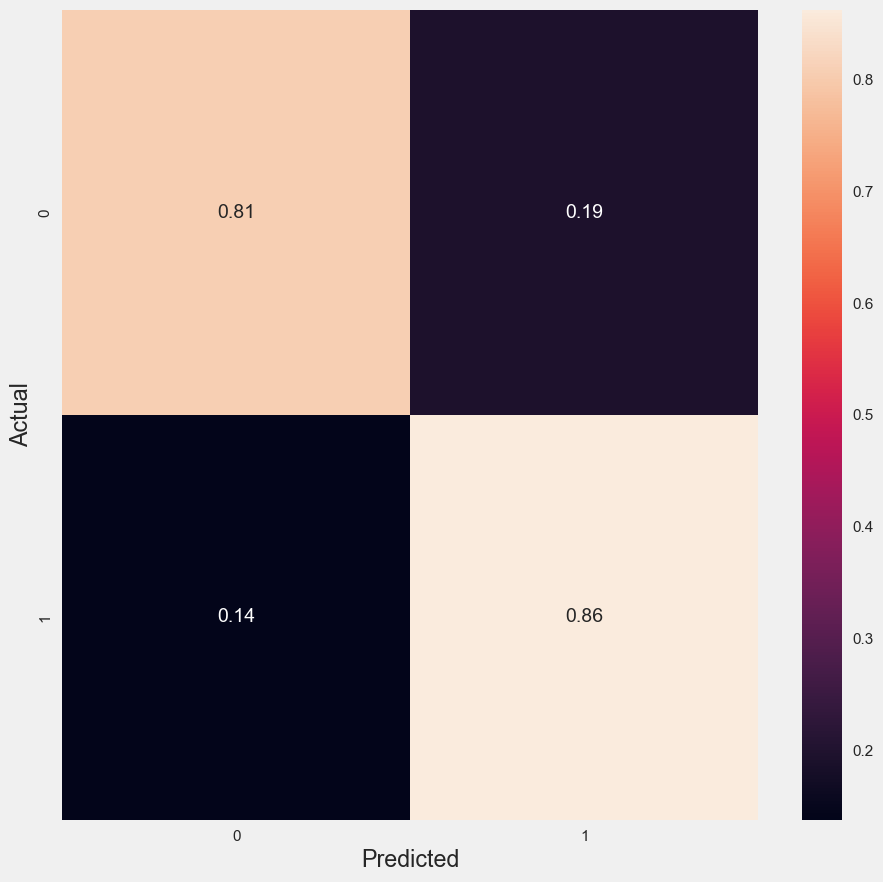

In [12]:
from numpy import mean
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import fbeta_score, f1_score, accuracy_score,log_loss, roc_auc_score, recall_score, matthews_corrcoef,make_scorer
from imblearn.under_sampling import RandomUnderSampler

df = df.sample(frac=1, axis=0).reset_index(drop=True)
X = df.drop(columns=['class'], axis=1)
y = df[['class']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=5)

rus = RandomUnderSampler(random_state=42)

X_res, y_res = rus.fit_resample(X_train, y_train)
print(y_res.value_counts())

model = XGBClassifier()

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# model = xgb.XGBClassifier(random_state=13)
ftwo_scorer = make_scorer(fbeta_score, beta=2)
matthews = make_scorer(matthews_corrcoef)
scoring = {'f2_score': ftwo_scorer, 'matthews': matthews, 'accuracy': 'accuracy', 'roc_auc': 'roc_auc',
           'recall': 'recall'}

scores = cross_validate(model, X_res, y_res, cv=5,
                        scoring=scoring)

print('Validation Results:')
print("Accuracy CV: %.4g" % np.mean(scores['test_accuracy']))
print("AUC Score CV: %f" % np.mean(scores['test_roc_auc']))
print("Recall Score CV: %f" % np.mean(scores['test_recall']))
print("f2 Score CV: %f" % np.mean(scores['test_f2_score']))
print("MCC Score CV: %f" % np.mean(scores['test_matthews']))
# f2score = fbeta_score(y_test, preds, average=None, beta=2)
# f2scorew = fbeta_score(y_test, preds, average='weighted', beta=2)
# f1 = f1_score(y_test, preds)
# print(mean(f2score))
# print(f2scorew)
# print(f1)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model.fit(X_res, y_res, eval_metric = 'error')
preds = model.predict(X_test)
preds_prob = model.predict_proba(X_test)
print('Test Results:')
print("Test Accuracy : %.4g" % accuracy_score(y_test, preds))
print("Log Loss : %.4g" % log_loss(y_test, preds_prob))
print("AUC Score (Test): %f" % roc_auc_score(y_test, preds))
print("Recall Score (Test): %f" % recall_score(y_test, preds))
print("f2 Score (Test): %f" % fbeta_score(y_test, preds, beta=2, average='weighted'))
print("MCC Score CV: %f" % matthews_corrcoef(y_test, preds))

cm = confusion_matrix(y_test, preds)
print(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cmn)
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['0','1'], yticklabels=['0','1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [27]:
from numpy import mean
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import fbeta_score, f1_score
# generate dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=5)
# count examples in each class
counter = Counter(y_train['class'])
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

model = XGBClassifier(scale_pos_weight=99)
# define evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(model, X_train, y_train, scoring='f2', cv=cv, n_jobs=-1)
# # summarize performance
# print('Mean f1_score: %.5f' % mean(scores))

model.fit(X_train,y_train, eval_set=[(X_train,y_train)])
preds = model.predict(X_test)
f2score = fbeta_score(y_test, preds, average=None, beta=2)
f2scorew = fbeta_score(y_test, preds, average='weighted', beta=2)
f1 = f1_score(y_test, preds)
print(mean(f2score))
print(f2scorew)
print(f1)


Estimate: 2.475
[0]	validation_0-logloss:0.83724
[1]	validation_0-logloss:0.99399
[2]	validation_0-logloss:1.14930
[3]	validation_0-logloss:1.29862
[4]	validation_0-logloss:1.44284
[5]	validation_0-logloss:1.57149
[6]	validation_0-logloss:1.69046
[7]	validation_0-logloss:1.78659
[8]	validation_0-logloss:1.87531
[9]	validation_0-logloss:1.95265
[10]	validation_0-logloss:2.00398
[11]	validation_0-logloss:2.03608
[12]	validation_0-logloss:2.07073
[13]	validation_0-logloss:2.08265
[14]	validation_0-logloss:2.08361
[15]	validation_0-logloss:2.03245
[16]	validation_0-logloss:2.01810
[17]	validation_0-logloss:2.01716
[18]	validation_0-logloss:2.00770
[19]	validation_0-logloss:1.95534
[20]	validation_0-logloss:1.95008
[21]	validation_0-logloss:1.94666
[22]	validation_0-logloss:1.93577
[23]	validation_0-logloss:1.92901
[24]	validation_0-logloss:1.90022
[25]	validation_0-logloss:1.89276
[26]	validation_0-logloss:1.88718
[27]	validation_0-logloss:1.86935
[28]	validation_0-logloss:1.85903
[29]	val